In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Preprocessing

Preprocessing Dataset before using Apache Kafka, as it is much simpler to use Pandas than Apache Spark

Data obtained from: 

https://climate.nasa.gov/vital-signs/global-temperature/

OECD.Stat

Data obtained from here: https://stats.oecd.org/Index.aspx?DataSetCode=air_ghg

I removed these lines from the text file

```
Land-Ocean Temperature Index (C)
--------------------------------

Year No_Smoothing  Lowess(5)
----------------------------
```

In [2]:
dataset = pd.read_csv('../Land_Ocean_Temperature_Index.txt', delim_whitespace=True, names=['Year', 'No_Smoothing', 'Lowess(5)'])

dataset

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.21
4,1884,-0.28,-0.24
...,...,...,...
138,2018,0.85,0.93
139,2019,0.98,0.92
140,2020,1.02,0.92
141,2021,0.85,0.91


In [3]:
dataset.to_csv('../Data/Old/NASA_SurfaceTemperature.csv', index=False)

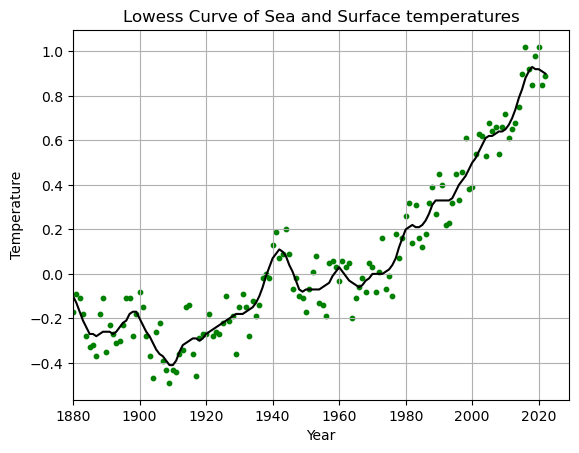

In [4]:
# Never heard of a lowess graph
year, lowess, temperature = dataset['Year'], dataset['Lowess(5)'], dataset['No_Smoothing']

# disregard these commented two lines.
#lowess_df = sm.nonparametric.lowess( temperature, year)
#plt.plot(lowess_df[:, 0], lowess_df[:, 1], color='red')
plt.plot(year, lowess, color='black')
plt.scatter(year, temperature, s=10, color='green')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Lowess Curve of Sea and Surface temperatures')
plt.xlim(year.iloc[0], None)
plt.grid()
plt.show()

In [5]:
# be sure to rename this value if you are going to run the script on your machine
dataset = pd.read_csv('../Data/AIR_TEMPERATURE.csv')
dataset

,DATAFLOW,REF_AREA: Reference area,FREQ: Frequency of observation,MEASURE: Measure,UNIT_MEASURE: Unit of measure,DURATION: Duration,HEAT_STRESS: Heat stress thresholds,RET_PERIOD: Return periods,HURRICANE_WIND_SCALE: Hurricane wind scale thresholds,TIME_PERIOD: Time period,OBS_VALUE,OBS_STATUS: Observation status,UNIT_MULT: Unit multiplier,DECIMALS: Decimals
0,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),YEM: Yemen,A: Annual,TEMP_C: Annual temperature change,C: Degrees celsius,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,1979,-0.55,NaN,0: Units,2: Two
1,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),YEM: Yemen,A: Annual,TEMP_C: Annual temperature change,C: Degrees celsius,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,1980,-0.17,NaN,0: Units,2: Two
2,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),YEM: Yemen,A: Annual,TEMP_C: Annual temperature change,C: Degrees celsius,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,1981,-0.48,NaN,0: Units,2: Two
3,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),YEM: Yemen,A: Annual,TEMP_C: Annual temperature change,C: Degrees celsius,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,1982,-0.53,NaN,0: Units,2: Two
4,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),YEM: Yemen,A: Annual,TEMP_C: Annual temperature change,C: Degrees celsius,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,1983,-0.89,NaN,0: Units,2: Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872690,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),ID02: Banten Province,A: Annual,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,W4T6: from 4 to 6 weeks,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,2017,0.00,NaN,0: Units,2: Two
872691,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),ID02: Banten Province,A: Annual,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,W4T6: from 4 to 6 weeks,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,2018,0.00,NaN,0: Units,2: Two
872692,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),ID02: Banten Province,A: Annual,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,W4T6: from 4 to 6 weeks,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,2019,0.00,NaN,0: Units,2: Two
872693,OECD.ENV.EPI:DSD_ECH@EXT_TEMP(1.0),ID02: Banten Province,A: Annual,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,W4T6: from 4 to 6 weeks,_Z: Not applicable,_Z: Not applicable,_Z: Not applicable,2020,0.00,NaN,0: Units,2: Two


In [6]:
dataset2 = dataset[['REF_AREA: Reference area', 'MEASURE: Measure', 'UNIT_MEASURE: Unit of measure', 'TIME_PERIOD: Time period', 'OBS_VALUE']]
dataset2

,REF_AREA: Reference area,MEASURE: Measure,UNIT_MEASURE: Unit of measure,TIME_PERIOD: Time period,OBS_VALUE
0,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1979,-0.55
1,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1980,-0.17
2,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1981,-0.48
3,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1982,-0.53
4,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1983,-0.89
...,...,...,...,...,...
872690,ID02: Banten Province,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,2017,0.00
872691,ID02: Banten Province,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,2018,0.00
872692,ID02: Banten Province,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,2019,0.00
872693,ID02: Banten Province,ID_POP_IND: Population exposure to icing days,PT_POP: Percentage of population,2020,0.00


In [7]:
dataset2 = dataset2.rename(columns={ 'REF_AREA: Reference area': 'REF_AREA', 'MEASURE: Measure' : 'Measure', 'UNIT_MEASURE: Unit of measure' : 'UNIT_MEASURE', 'TIME_PERIOD: Time period': 'TIME_PERIOD', 'OBS_VALUE' : 'OBS_VALUE' })

In [8]:
dataset2 = dataset2[dataset2['UNIT_MEASURE'] == 'C: Degrees celsius']
dataset2

,REF_AREA,Measure,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE
0,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1979,-0.55
1,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1980,-0.17
2,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1981,-0.48
3,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1982,-0.53
4,YEM: Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1983,-0.89
...,...,...,...,...,...
870558,UKE: Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2017,0.73
870559,UKE: Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2018,0.62
870560,UKE: Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2019,0.53
870561,UKE: Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2020,0.75


In [9]:
dataset2['REF_AREA'].unique()

array(['YEM: Yemen', 'RO31: South - Muntenia',
       'TRB2: Eastern Anatolia - East', 'MMR: Myanmar',
       'FRY3: French Guiana (region, level2)', 'TR10: Istanbul',
       'RO41: South West Oltenia', 'MNP: Northern Mariana Islands',
       'CA47: Saskatchewan', 'US49: Utah', 'COK: Cook Islands',
       'LTU: Lithuania', 'FI1D: Eastern and Northern Finland',
       'NZ18: Manawatu-Wanganui Region', 'NZ25: Southland Region',
       'ME08: Chihuahua', 'TR32: Southern Aegean', 'US37: North Carolina',
       'ES51: Catalonia', 'KIR: Kiribati', 'PCN: Pitcairn',
       'PT11: North (PT)', 'SYR: Syrian Arab Republic',
       'HU22: Western Transdanubia', 'LT01: Vilnius Region',
       'ME21: Puebla', 'FRO: Faroe Islands', 'TUR: Türkiye',
       'BG41: South West', 'ES13: Cantabria', 'MOZ: Mozambique',
       'CR02: Chorotega', 'TR71: Central Anatolia - Middle',
       'NZ12: Auckland Region', 'SYC: Seychelles', 'LU00: Luxembourg',
       'NL31: Utrecht', 'AT12: Lower Austria', 'CL14: Los Rí

In [10]:
len(dataset2)

30014

In [11]:
country_code = list()
def split_REF_AREA(area) :
    splitter = area.split(': ')
    country_code.append(splitter[0])
    return splitter[1]

dataset2['REF_AREA'] = dataset2['REF_AREA'].apply(lambda x : split_REF_AREA(x))
dataset2['REF_CODE'] = country_code

dataset2

,REF_AREA,Measure,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,REF_CODE
0,Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1979,-0.55,YEM
1,Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1980,-0.17,YEM
2,Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1981,-0.48,YEM
3,Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1982,-0.53,YEM
4,Yemen,TEMP_C: Annual temperature change,C: Degrees celsius,1983,-0.89,YEM
...,...,...,...,...,...,...
870558,Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2017,0.73,UKE
870559,Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2018,0.62,UKE
870560,Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2019,0.53,UKE
870561,Yorkshire and The Humber,TEMP_C: Annual temperature change,C: Degrees celsius,2020,0.75,UKE


In [12]:
dataset2.to_csv('../Data/temperature.csv', index=False)

In [6]:
import pandas as pd

dataset3 = pd.read_csv('../Data/temperature.csv')

dataset3.loc[14792]

REF_AREA                                   Murcia
Measure         TEMP_C: Annual temperature change
UNIT_MEASURE                   C: Degrees celsius
TIME_PERIOD                                  1979
OBS_VALUE                                    -0.5
REF_CODE                                     ES62
Name: 14792, dtype: object